In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 19 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.rc('font', family='NanumBarunGothic')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# 데이터 불러오기

In [ ]:
import pandas as pd

In [ ]:
data_0 = pd.read_csv('/content/drive/MyDrive/청년인재팀플/data/사고다발지아닌_생활인구_최종데이터.csv',index_col=0)
data_0= data_0.dropna()

In [ ]:
data_0.shape

(117, 30)

In [ ]:
data_1 = pd.read_csv('/content/drive/MyDrive/청년인재팀플/data/사고다발지_생활인구_최종데이터.csv',index_col=0)
data_1.shape

(553, 30)

In [ ]:
data_0.rename(columns={'노인보호구':'노인보호'},inplace=True)

In [ ]:
data_0['label'] = 0
data_1['label'] = 1

In [ ]:
sum_data = pd.concat([data_0,data_1])

In [ ]:
sum_data.columns

Index(['TOT_REG_CD', 'geometry', 'hospital', 'bus', 'subway', 'univ', '초중고',
       'CarLane100', 'police', '횡단보도', '무단횡단방', '어린이보호', '노인보호', '야간총생활인구수',
       '야간 남자 10대 이하', '야간 여자 10대 이하', '야간 남자 20-50대', '야간 여자 20-50대',
       '야간 남자 60대 이상', '야간 여자 60대 이상', '집계구코드', '주간야간', '행정동코드', '주간총생활인구수',
       '주간 남자 10대 이하', '주간 여자 10대 이하', '주간 남자 20-50대', '주간 여자 20-50대',
       '주간 남자 60대 이상', '주간 여자 60대 이상', 'label'],
      dtype='object')

In [ ]:
sum_data = sum_data.drop(['집계구코드','행정동코드','주간야간','CarLane100'],axis=1)

In [ ]:
sum_data=sum_data.reset_index(drop=True)

In [ ]:
from sklearn.model_selection import train_test_split

X = sum_data.iloc[:,2:-1]
y = sum_data['label']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,stratify=y,random_state=42)

In [ ]:
sum_data.head(5)

,TOT_REG_CD,geometry,hospital,bus,subway,univ,초중고,police,횡단보도,무단횡단방,...,야간 남자 60대 이상,야간 여자 60대 이상,주간총생활인구수,주간 남자 10대 이하,주간 여자 10대 이하,주간 남자 20-50대,주간 여자 20-50대,주간 남자 60대 이상,주간 여자 60대 이상,label
0,1101058030001,POLYGON ((952982.2732868195 1952340.3033161163...,10.0,9.0,0.0,0.0,2.0,0.0,23.0,0.0,...,120.453434,156.917172,1893.225234,40.315908,41.882898,706.723701,673.472158,165.766148,202.832158,0
1,1101061030002,POLYGON ((954897.3367862701 1953028.0343151093...,17.0,12.0,1.0,2.0,4.0,1.0,9.0,1.0,...,227.942141,216.943553,5758.403367,75.145889,100.934068,2579.668056,1857.960382,519.187664,531.877902,0
2,1101061030001,"POLYGON ((954124.9687862396 1953097.410917282,...",5.0,5.0,0.0,0.0,0.0,1.0,18.0,0.0,...,322.075119,339.466224,17490.969720,109.370100,181.244090,9013.094199,6085.046981,882.282381,1023.411349,0
3,1101063010002,"POLYGON ((956621.066286087 1952984.7079143524,...",23.0,6.0,0.0,0.0,0.0,1.0,32.0,1.0,...,60.221219,75.294504,477.759194,21.565894,15.952663,155.784047,130.972405,59.348716,76.851109,0
4,1125065010003,POLYGON ((967002.0705814362 1947837.7530918121...,5.0,4.0,0.0,0.0,4.0,0.0,18.0,0.0,...,111.570773,179.103396,2183.716690,122.091858,92.317684,611.557218,691.429049,182.165828,287.289811,0


# EDA

Glyph 8722 missing from current font.
Glyph 8722 missing from current font.


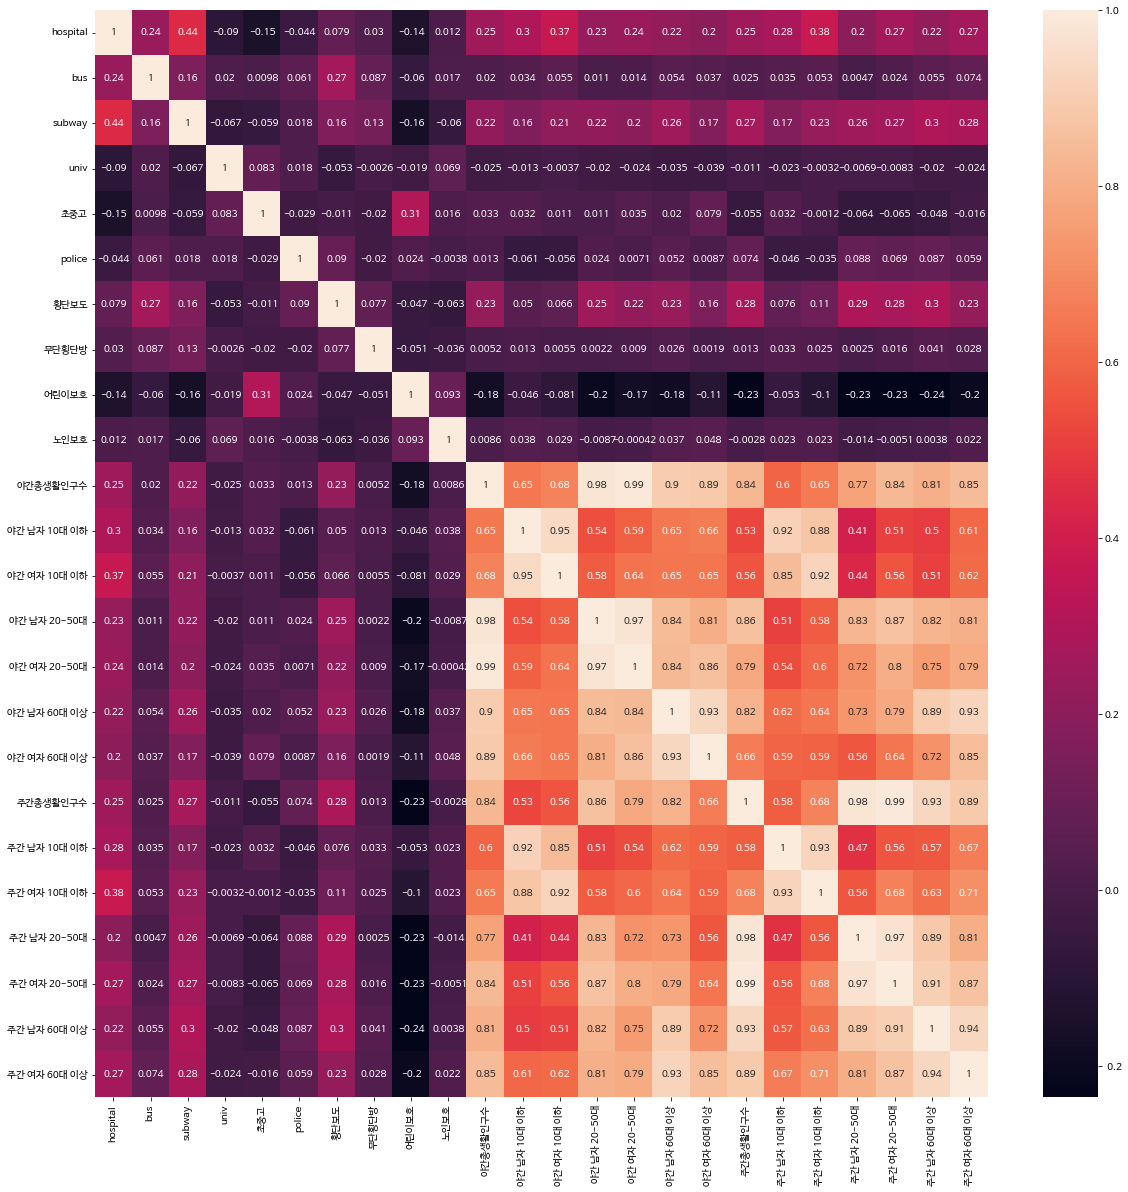

In [ ]:
plt.figure(figsize=(20,20))
sns.heatmap(X.corr(),annot=True)

# GridSearch Pipeline

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

In [ ]:
def algorithm_pipeline(X_train_data, X_test_data, y_train_data, y_test_data, 
                       model, param_grid, cv=10, scoring_fit='accuracy',
                       do_probabilities = False):
    gs = GridSearchCV(
        estimator=model,
        param_grid=param_grid, 
        cv=cv, 
        n_jobs=-1, 
        scoring=scoring_fit,
        verbose=2
    )
    fitted_model = gs.fit(X_train_data, y_train_data)
    
    if do_probabilities:
      pred = fitted_model.predict_proba(X_test_data)
    else:
      pred = fitted_model.predict(X_test_data)
    
    return fitted_model, pred

# Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
model = DecisionTreeClassifier()
param_grid = {
    'max_depth': [15,20,25],
    'max_leaf_nodes': [50, 100, 200]
}

model, pred = algorithm_pipeline(X_train, X_test, y_train, y_test, model, 
                                 param_grid, cv=5)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


0.7742644513672551
{'max_depth': 25, 'max_leaf_nodes': 100}


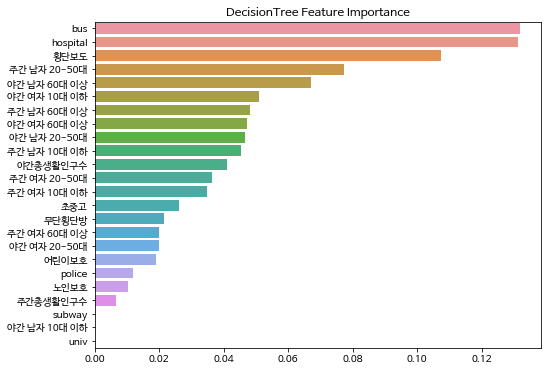

In [ ]:
print(model.best_score_)
print(model.best_params_)

ft_importance_values = model.best_estimator_.feature_importances_
ft_series = pd.Series(ft_importance_values, index = X.columns).sort_values(ascending=False)
plt.figure(figsize=(8,6))
plt.title('DecisionTree Feature Importance')
sns.barplot(x=ft_series, y=ft_series.index)
plt.show()

In [ ]:
import shap
explainer = shap.TreeExplainer(model.best_estimator_)
shap_values = explainer.shap_values(X_test)

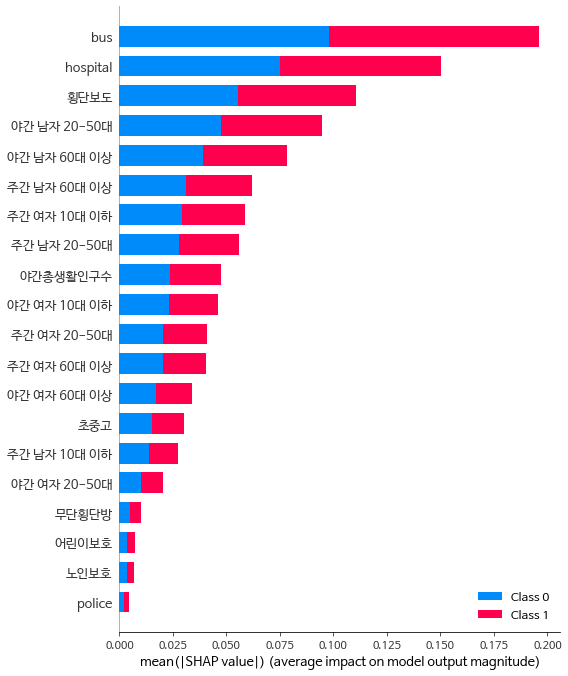

In [ ]:
shap.summary_plot(shap_values, X_test, plot_type="bar")

In [ ]:
print(classification_report(y_test,model.best_estimator_.predict(X_test)))

              precision    recall  f1-score   support

           0       0.48      0.48      0.48        23
           1       0.89      0.89      0.89       111

    accuracy                           0.82       134
   macro avg       0.69      0.69      0.69       134
weighted avg       0.82      0.82      0.82       134



# XGBoost

In [ ]:
import xgboost as xgb

model = xgb.XGBClassifier(booster='gbtree')
param_grid = {
    'n_estimators': [400, 700, 1000],
    'colsample_bytree': [0.7, 0.8],
    'max_depth': [15,20,25],
    'reg_alpha': [1.1, 1.2, 1.3],
    'reg_lambda': [1.1, 1.2, 1.3],
    'subsample': [0.7, 0.8, 0.9]
}

model, pred = algorithm_pipeline(X_train, X_test, y_train, y_test, model, 
                                 param_grid, cv=5)

Fitting 5 folds for each of 486 candidates, totalling 2430 fits


0.8283142956040151
{'colsample_bytree': 0.7, 'max_depth': 15, 'n_estimators': 400, 'reg_alpha': 1.1, 'reg_lambda': 1.1, 'subsample': 0.9}


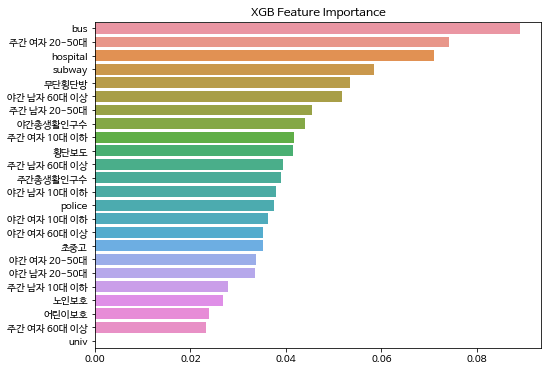

In [ ]:
print(model.best_score_)
print(model.best_params_)
ft_importance_values = model.best_estimator_.feature_importances_
ft_series = pd.Series(ft_importance_values, index = X.columns).sort_values(ascending=False)
plt.figure(figsize=(8,6))
plt.title('XGB Feature Importance')
sns.barplot(x=ft_series, y=ft_series.index)
plt.show()

In [ ]:
import shap
explainer = shap.TreeExplainer(model.best_estimator_)
shap_values = explainer.shap_values(X_test)

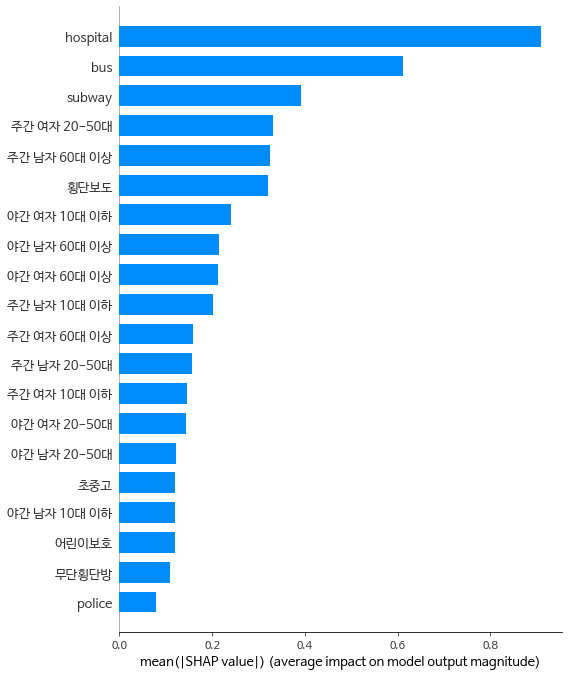

In [ ]:
shap.summary_plot(shap_values, X_test, plot_type="bar")

In [ ]:
print(classification_report(y_test,model.best_estimator_.predict(X_test)))

              precision    recall  f1-score   support

           0       0.82      0.39      0.53        23
           1       0.89      0.98      0.93       111

    accuracy                           0.88       134
   macro avg       0.85      0.69      0.73       134
weighted avg       0.87      0.88      0.86       134



# LightGBM

In [ ]:
import lightgbm as lgb

model = lgb.LGBMClassifier()
param_grid = {
    'n_estimators': [400, 700, 1000],
    'colsample_bytree': [0.7, 0.8],
    'max_depth': [15,20,25],
    'num_leaves': [50, 100, 200],
    'reg_alpha': [1.1, 1.2, 1.3],
    'reg_lambda': [1.1, 1.2, 1.3],
    'min_split_gain': [0.3, 0.4],
    'subsample': [0.7, 0.8, 0.9],
    'subsample_freq': [20]
}

model, pred = algorithm_pipeline(X_train, X_test, y_train, y_test, model, 
                                 param_grid, cv=5, scoring_fit='accuracy')

Fitting 5 folds for each of 2916 candidates, totalling 14580 fits


0.8283142956040154
{'colsample_bytree': 0.7, 'max_depth': 15, 'min_split_gain': 0.4, 'n_estimators': 400, 'num_leaves': 50, 'reg_alpha': 1.2, 'reg_lambda': 1.2, 'subsample': 0.8, 'subsample_freq': 20}


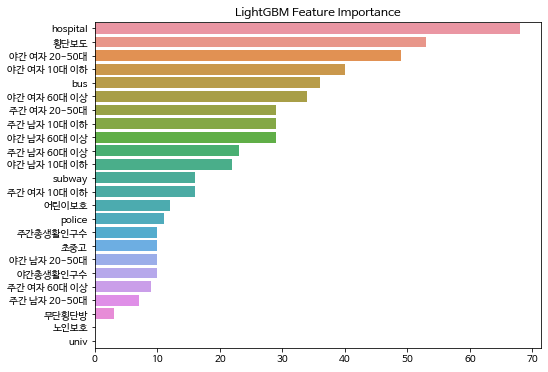

In [ ]:
print(model.best_score_)
print(model.best_params_)

ft_importance_values = model.best_estimator_.feature_importances_
ft_series = pd.Series(ft_importance_values, index = X.columns).sort_values(ascending=False)
plt.figure(figsize=(8,6))
plt.title('LightGBM Feature Importance')
sns.barplot(x=ft_series, y=ft_series.index)
plt.show()

In [ ]:
import shap
explainer = shap.TreeExplainer(model.best_estimator_)
shap_values = explainer.shap_values(X_test)

LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray


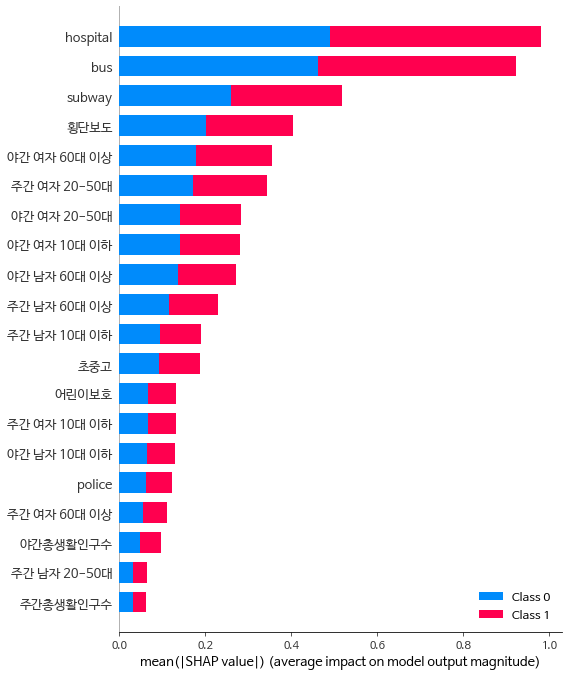

In [ ]:
shap.summary_plot(shap_values, X_test, plot_type="bar")

In [ ]:
print(classification_report(y_test,model.best_estimator_.predict(X_test)))

              precision    recall  f1-score   support

           0       0.75      0.26      0.39        23
           1       0.87      0.98      0.92       111

    accuracy                           0.86       134
   macro avg       0.81      0.62      0.65       134
weighted avg       0.85      0.86      0.83       134



# RandomForest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
param_grid = {
    'n_estimators': [400, 700, 1000],
    'max_depth': [15,20,25],
    'max_leaf_nodes': [50, 100, 200]
}

model, pred = algorithm_pipeline(X_train, X_test, y_train, y_test, model, 
                                 param_grid, cv=5, scoring_fit='accuracy')

Fitting 5 folds for each of 27 candidates, totalling 135 fits


0.8451194184839045
{'max_depth': 15, 'max_leaf_nodes': 200, 'n_estimators': 700}


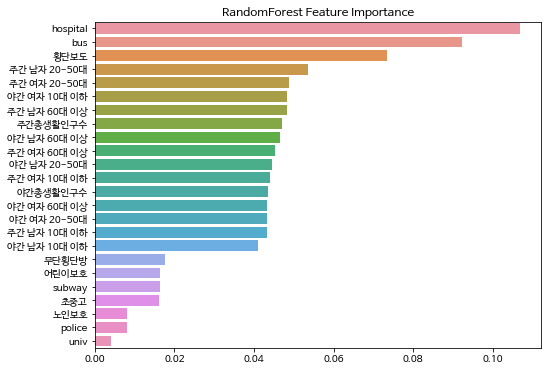

In [ ]:
print(model.best_score_)
print(model.best_params_)

ft_importance_values = model.best_estimator_.feature_importances_
ft_series = pd.Series(ft_importance_values, index = X.columns).sort_values(ascending=False)
plt.figure(figsize=(8,6))
plt.title('RandomForest Feature Importance')
sns.barplot(x=ft_series, y=ft_series.index)
plt.show()

In [ ]:
import shap
explainer = shap.TreeExplainer(model.best_estimator_)
shap_values = explainer.shap_values(X_test)

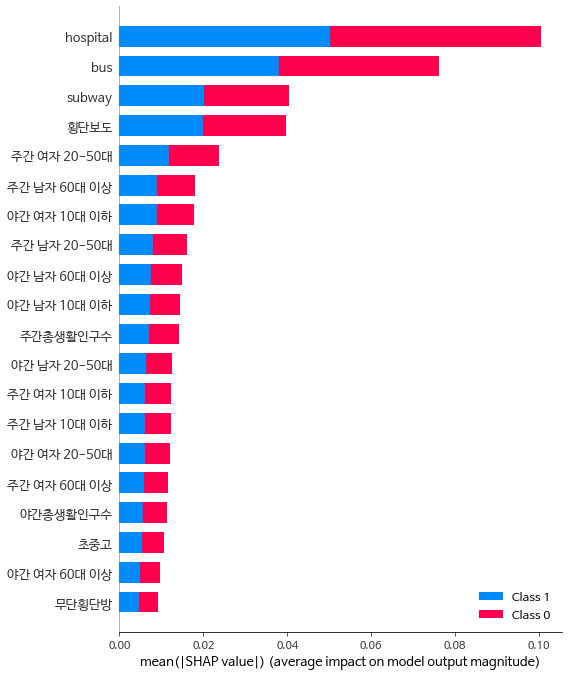

In [ ]:
shap.summary_plot(shap_values, X_test, plot_type="bar")

In [ ]:
print(classification_report(y_test,model.best_estimator_.predict(X_test)))

              precision    recall  f1-score   support

           0       0.91      0.43      0.59        23
           1       0.89      0.99      0.94       111

    accuracy                           0.90       134
   macro avg       0.90      0.71      0.76       134
weighted avg       0.90      0.90      0.88       134



# 중요도 높은 변수 세부내용 시각화

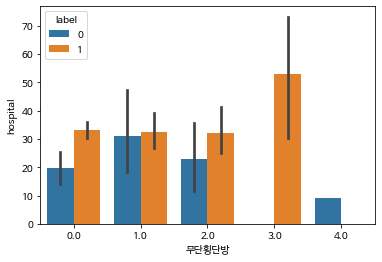

In [ ]:
sns.barplot(data=sum_data, x='무단횡단방',y='hospital',hue='label')

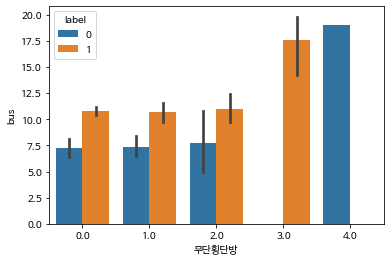

In [ ]:
sns.barplot(data=sum_data, x='무단횡단방',y='bus',hue='label')

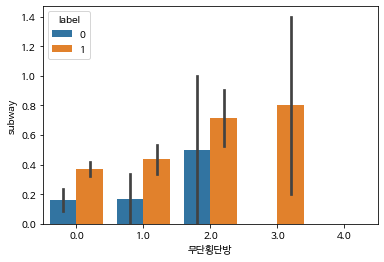

In [ ]:
sns.barplot(data=sum_data, x='무단횡단방',y='subway',hue='label')

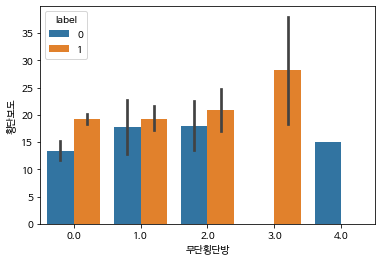

In [ ]:
sns.barplot(data=sum_data, x='무단횡단방',y='횡단보도',hue='label')

# 최종 선택 모델과 TEST SET 예측

In [ ]:
final_model = RandomForestClassifier(max_depth=15,max_leaf_nodes=200,n_estimators=700)
final_model.fit(X,y)

RandomForestClassifier(max_depth=15, max_leaf_nodes=200, n_estimators=700)

In [ ]:
final_test_data=pd.read_csv('/content/drive/MyDrive/청년인재팀플/data/집계구지역생활최종.csv',index_col=0)

In [ ]:
final_test_data_X=final_test_data.iloc[:,1:]

In [ ]:
final_test_data_X

,hospital,bus,subway,univ,초중고,police,횡단보도,무단횡단방,어린이보호,노인보호,...,야간 여자 20-50대,야간 남자 60대 이상,야간 여자 60대 이상,주간총생활인구수,주간 남자 10대 이하,주간 여자 10대 이하,주간 남자 20-50대,주간 여자 20-50대,주간 남자 60대 이상,주간 여자 60대 이상
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,169.425374,51.093335,76.020190,419.497240,11.185691,18.032033,127.228223,145.356836,37.224282,54.709109
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,119.229284,39.602919,57.761559,387.197676,20.158070,23.536100,86.706171,114.715658,38.292590,58.181485
2,0.0,8.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,...,480.741510,133.090319,207.528012,1888.482479,79.080596,108.297862,491.584630,613.666430,166.684282,266.261768
3,0.0,0.0,0.0,0.0,0.0,0.0,10.0,0.0,0.0,0.0,...,579.926196,159.640733,249.305331,1832.894163,61.319222,89.481100,539.856925,611.939219,165.958207,245.334153
4,4.0,2.0,0.0,0.0,0.0,0.0,6.0,0.0,0.0,0.0,...,278.497951,84.166265,103.422363,1344.949739,27.290130,29.615676,482.226812,494.552780,125.259806,151.320411
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19138,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,91.171766,24.339952,46.888435,142.219538,0.918899,2.077276,37.547254,41.325306,10.374799,17.591713
19139,16.0,4.0,0.0,0.0,0.0,0.0,31.0,0.0,0.0,0.0,...,638.609333,157.134427,86.650333,9364.272794,31.459038,56.867262,4881.325405,3436.688107,561.731302,362.977558
19140,1.0,5.0,0.0,0.0,0.0,2.0,11.0,0.0,0.0,0.0,...,684.833823,110.629026,118.769423,3904.730881,58.375696,66.754297,1536.796890,1500.655594,333.648142,333.764971
19141,4.0,3.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,1.0,...,416.778790,134.065165,190.754640,2014.266828,55.548174,51.407567,659.033368,679.881235,182.914630,282.303237


In [ ]:
final_test_data['만들어진라벨'] = final_model.predict(final_test_data_X)

In [ ]:
def get_predict_proba(row,model):
  y_pred_prob=model.predict_proba(row.values.reshape(1,-1))
  ix = y_pred_prob[0][1]
  return ix
final_test_data['위험확률'] = final_test_data_X.apply(lambda row: get_predict_proba(row,final_model),axis=1)

In [ ]:
final_test_data.shape

(19143, 27)

In [ ]:
final_test_data.isna().sum()

TOT_REG_CD      0
hospital        0
bus             0
subway          0
univ            0
초중고             0
police          0
횡단보도            0
무단횡단방           0
어린이보호           0
노인보호            0
야간총생활인구수        0
야간 남자 10대 이하    0
야간 여자 10대 이하    0
야간 남자 20-50대    0
야간 여자 20-50대    0
야간 남자 60대 이상    0
야간 여자 60대 이상    0
주간총생활인구수        0
주간 남자 10대 이하    0
주간 여자 10대 이하    0
주간 남자 20-50대    0
주간 여자 20-50대    0
주간 남자 60대 이상    0
주간 여자 60대 이상    0
만들어진라벨          0
위험확률            0
dtype: int64

In [ ]:
final_test_data.to_csv('/content/drive/MyDrive/청년인재팀플/data/입지선정확률데이터.csv')